# Image Transcription using CLIP + GPT
We do image transcription by alternating between:
- letting GPT suggest a number of potential next words
- let CLIP decide which of the suggested texts is the best

In [1]:
from transformers import pipeline, set_seed
from PIL import Image
import requests
from transformers import CLIPProcessor, CLIPModel
import numpy as np



gpt2 = pipeline('text-generation', model='gpt2')
set_seed(42)
clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
clip_processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")



ftfy or spacy is not installed using BERT BasicTokenizer instead of ftfy.


In [2]:
# Image input
url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)

In [10]:
transcription = ""
initial_proposals = [
    "This image shows",
    "This drawing shows",
    "This painting shows",
    "This photo shows",
    "This picture shows",
    "This 3d render shows",
]

(-0.5, 639.5, 479.5, -0.5)

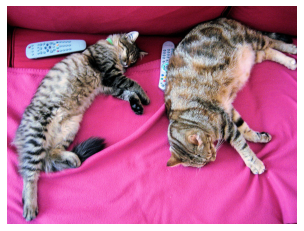

In [4]:
from matplotlib import pyplot as plt

plt.imshow(image)
plt.axis('off')

Show CLIP score over sequence

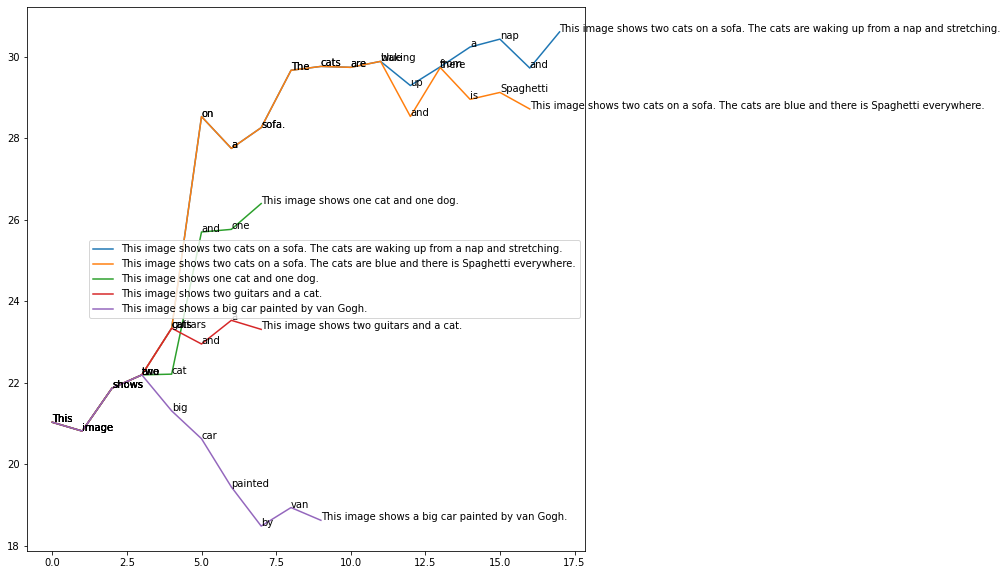

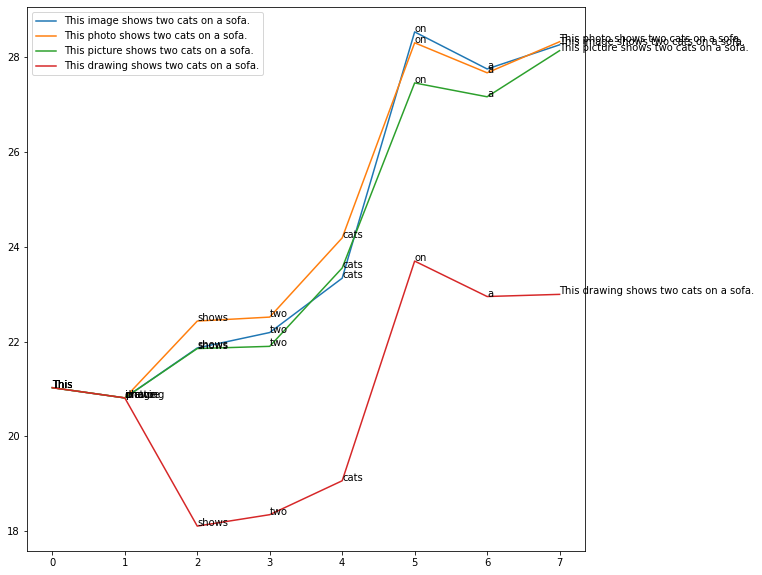

In [13]:

def compare_descriptions(descriptions):
    plt.figure(figsize=(10, 10))
    for description in descriptions:
        proposals = []
        for i in range(len(description.split(" "))):
            proposals += [" ".join(description.split(" ")[:i])]
        inputs = clip_processor(text=proposals, images=image, return_tensors="pt", padding=True)
        outputs = clip_model(**inputs)
        score_at_word = outputs.logits_per_image[0].detach().numpy()
        plt.plot(score_at_word, label=description)
        for i, (word, score) in enumerate(zip(description.split(" ")[:-1], score_at_word)):
            plt.text(i, score, word)
        plt.text(i+1, score_at_word[-1], description) 
    plt.legend()
    plt.show()
    

compare_descriptions([
    "This image shows two cats on a sofa. The cats are waking up from a nap and stretching.",
    "This image shows two cats on a sofa. The cats are blue and there is Spaghetti everywhere.",
    "This image shows one cat and one dog.",
    "This image shows two guitars and a cat.",
    "This image shows a big car painted by van Gogh."
])


compare_descriptions([
    "This image shows two cats on a sofa.",
    "This photo shows two cats on a sofa.",
    "This picture shows two cats on a sofa.",
    "This drawing shows two cats on a sofa."
])

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


-- This photo shows


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


This photo shows two bodies of a


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


This photo shows two-legged,


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


This photo shows the three bodies of


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


This photo shows the three bodies of


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


This photo shows a couple sleeping in


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


This photo shows a pair of pairs


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


This photo shows three of its victims


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


This photo shows a pair of large


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


This photo shows how to mount an
This photo shows a "lazy


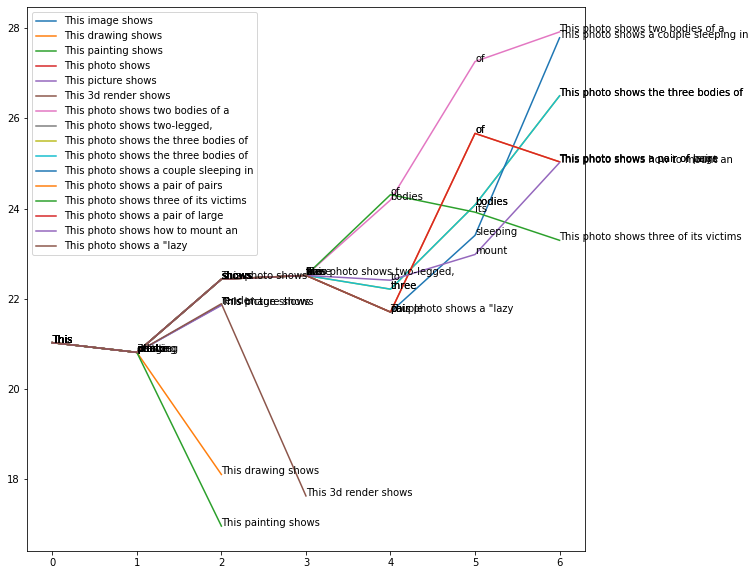

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


-- This photo shows two bodies of a


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


This photo shows two bodies of a cat. REUTERS/


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


This photo shows two bodies of a cat that died last


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


This photo shows two bodies of a cat, the Cat


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


This photo shows two bodies of a cat which has just


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


This photo shows two bodies of a cat that was killed


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


This photo shows two bodies of a cat (seen on


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


This photo shows two bodies of a dead kitten, on


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


This photo shows two bodies of a cat that lay dead


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


This photo shows two bodies of a cat, identified by
This photo shows two bodies of a small kitten after a


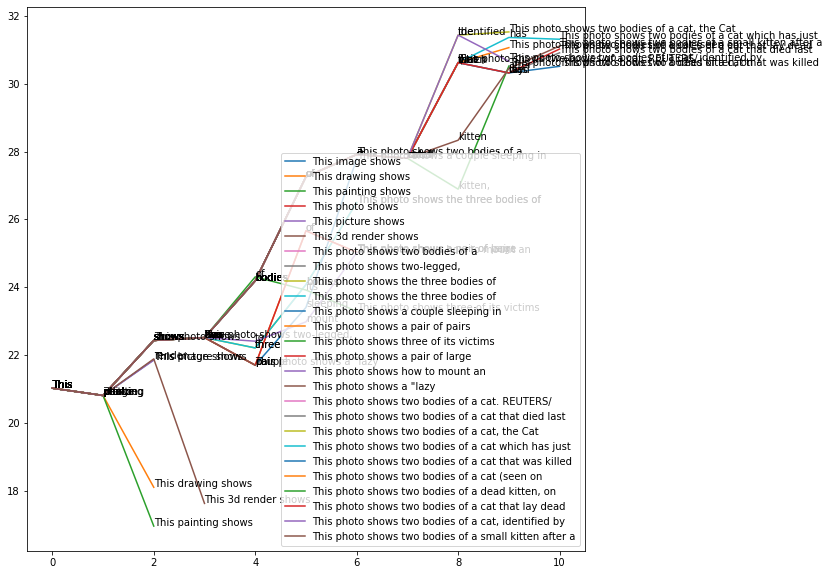

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


-- This photo shows two bodies of a cat (seen on


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


This photo shows two bodies of a cat (seen on July 5, 2011


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


This photo shows two bodies of a cat (seen on July 3, 2010


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


This photo shows two bodies of a cat (seen on March 4, 2012


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


This photo shows two bodies of a cat (seen on March 14, 2010


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


This photo shows two bodies of a cat (seen on July 2, 2011


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


This photo shows two bodies of a cat (seen on Flickr CC) killed


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


This photo shows two bodies of a cat (seen on Flickr, April 2011


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


This photo shows two bodies of a cat (seen on Flickr, June 2013


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


This photo shows two bodies of a cat (seen on July 5, 2011
This photo shows two bodies of a cat (seen on July 4, 2011


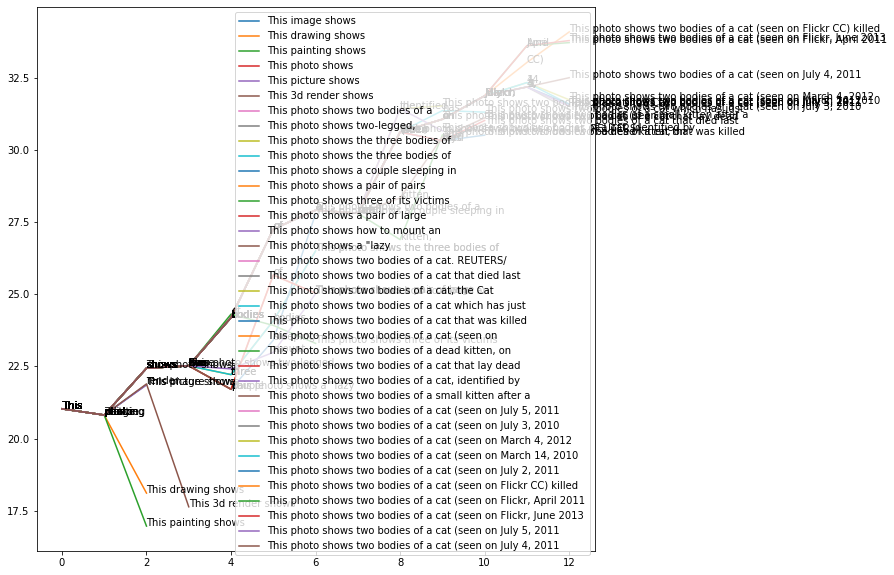

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


-- This photo shows two bodies of a cat (seen on Flickr, April 2011


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


This photo shows two bodies of a cat (seen on Flickr, April 2011) tied together and


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


This photo shows two bodies of a cat (seen on Flickr, April 2011) with multiple stab


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


This photo shows two bodies of a cat (seen on Flickr, April 2011) carrying a knife


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


This photo shows two bodies of a cat (seen on Flickr, April 2011) with a pink


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


This photo shows two bodies of a cat (seen on Flickr, April 2011) with their bodies


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


This photo shows two bodies of a cat (seen on Flickr, April 2011) tied up a


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


This photo shows two bodies of a cat (seen on Flickr, April 2011) tied up in


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


This photo shows two bodies of a cat (seen on Flickr, April 2011) with severed arms


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


This photo shows two bodies of a cat (seen on Flickr, April 2011, right) tied
This photo shows two bodies of a cat (seen on Flickr, April 2011) with missing limbs


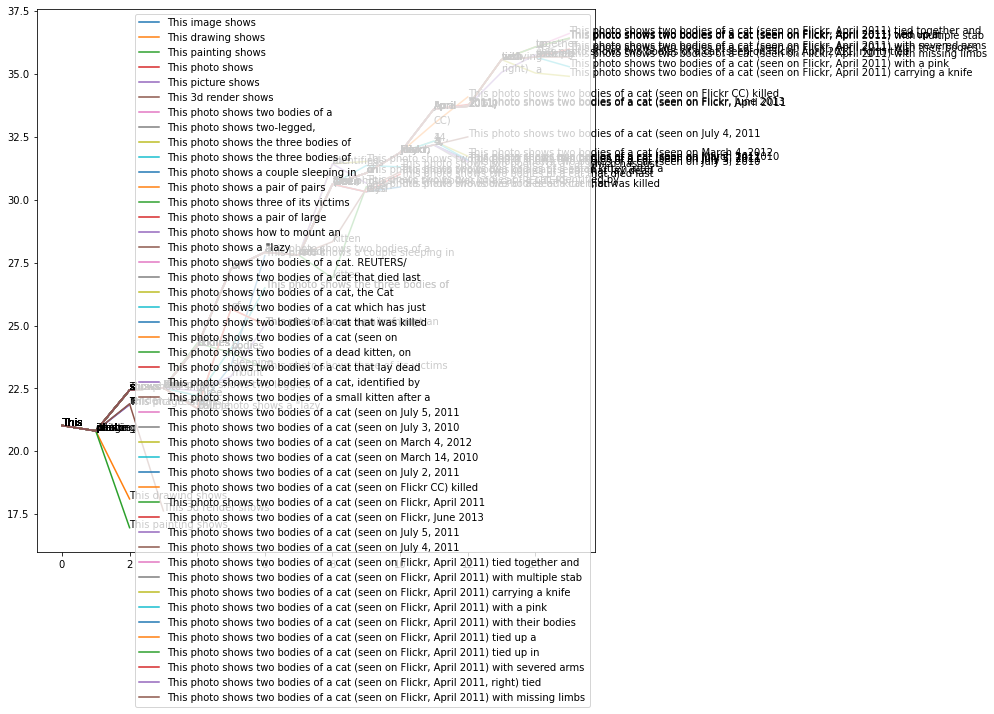

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


-- This photo shows two bodies of a cat (seen on Flickr, April 2011) carrying a knife


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


This photo shows two bodies of a cat (seen on Flickr, April 2011) carrying a knife attached to their bodies


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


This photo shows two bodies of a cat (seen on Flickr, April 2011) carrying a knife as they lay on


In [ ]:
def select_from_proposals(proposals, image):
    inputs = clip_processor(text=proposals, images=image, return_tensors="pt", padding=True)
    outputs = clip_model(**inputs)
    logits_per_image = outputs.logits_per_image[0] # this is the image-text similarity score
    scores = logits_per_image.detach().numpy()
    chosen_id = np.argmax(scores)
    return proposals[chosen_id], scores[chosen_id]


def propose(transcription, max_length):
    proposals = gpt2(transcription, max_length=max_length, num_return_sequences=1000)
    proposals = [i['generated_text'] for i in proposals]
    return proposals


def transcribe(image, initial_proposals, rounds_per_extension=10):
    candidate_history = list(initial_proposals)
    transcription, _ =  select_from_proposals(initial_proposals, image)
    
    for max_length in range(7, 200, 4):
        print("--", transcription)
        candidates = []
        candidate_scores = []
        for i in range(rounds_per_extension): # this loop does the same as turning up num_return_sequences, but keeps ram usage constant
            proposals = propose(transcription, max_length)
            candidate, candidate_score = select_from_proposals(proposals, image)
            candidates += [candidate]
            candidate_scores += [candidate_score]
            print(candidate)
        candidate_history += candidates
        compare_descriptions(candidate_history)
        transcription = candidates[np.argmax(candidate_scores)]
        
    return transcription


transcribe(image, initial_proposals)

Conclusion:
- transcriptions are better than random chance
- this is not a reliable way of doing image transcription, because most proposals don't make sense and we would need to search for a very long time until a useful proposal comes up for an unlikely image
- also CLIP does not punish wrong content after a fitting initial phrase anymore

In [ ]:
# skim_image = {
#     "image_type": ["photo", "painting", "3d render", "pixelart", "voxel rendering"],
#     "colors": [""]
# }